# Introduction to Q-Learning

In this notebook, I am going to try creating Q-learning models from simple to complex levels to solve certain standard problems pre-existing on https://gym.openai.com

Let's get started!

# Level 1: A simple model

Reinforcement learning, explained simply, is a computational approach where an agent interacts with an environment by taking actions in which it tries to maximize an accumulated reward. Here is a simple graph, which I will be referring to often:

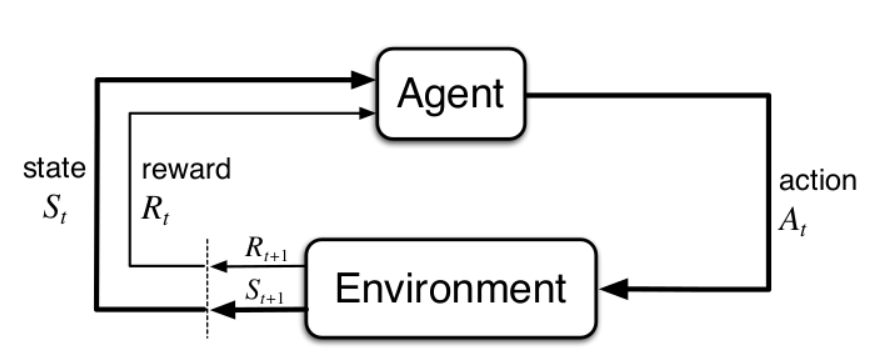

An agent in a current state (St) takes an action (At) to which the environment reacts and responds, returning a new state(St+1) and reward (Rt+1) to the agent. Given the updated state and reward, the agent chooses the next action, and the loop repeats until an environment is solved or terminated.

In [1]:
import gym
from gym import envs

import numpy as np
import time
from IPython.display import display, clear_output

In [4]:
env = gym.make('Taxi-v2')

In [16]:
# The starting state which is random
env.reset()

253

In [17]:
# Gives all the possible states in this environment
env.observation_space.n

500

In [18]:
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [12]:
# Gives the number of actions available to our agent
env.action_space.n

6

The six possible actions are: down (0), up (1), right (2), left (3), pick-up (4), and drop-off (5).

In [19]:
# Overriding the current state to 114 for learning purpose
env.env.s = 114
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [20]:
env.step(1)
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


So, we moved 'up' by taking step (1) which corresponds to "up" action.

In [21]:
print(env.step(1))

(14, -1, False, {'prob': 1.0})


These values are (state, reward, done, info)

Now that we have explored the basics, let's start again with a fresh code.

In [23]:
state = env.reset()
counter = 0
reward = None

while reward != 20:
    state, reward, done, info = env.step(env.action_space.sample())
    counter += 1

print(counter)

1870


In the above code, we saw that it took 1870 steps for our agent to reach the goal (or achieve a reward of 20, which is the goal). This approach is a _random policy approach_ in which the agent is trying out random actions until it gets the maximum reward.

Let's try to have the algorithm remember its actions and their associated rewards. In this case, the algorithm’s memory is going to be a *Q action value table*.

To manage this Q table, we will use a NumPy array. The size of this table will be the number of states (500) by the number of possible actions (6).

In [24]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

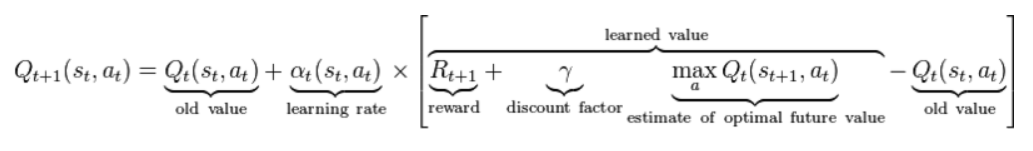

Over multiple episodes of trying to solve the problem, we will be updating our Q values using the Bellman equation shown above, slowly improving our algorithm’s efficiency and performance. We will also want to track our total accumulated reward for each episode, which we will define as **G**.

In [46]:
G = 0
alpha = 0.618 #learning rate

In [47]:
# Now, a very basic Q-learning algorithm

for episode in range(8000):
    done = False
    reward = 0
    state = env.reset()
    
    while not done:
        action = np.argmax(Q[state]) #1
        state1, reward, done, info = env.step(action) #2
        Q[state,action] += alpha * (reward + np.max(Q[state1]) - Q[state,action]) #3
        G += reward
        state = state1
    if episode % 500 == 0:
        display(print('Episode {} State: {} Total Reward: {}'.format(episode,state, G)))
        display(env.render())
        time.sleep(0.5)
        clear_output(wait=True)

Episode 7500 State: 97 Total Reward: 62803


None

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


None

-First (#1): The agent starts by choosing an action with the highest Q value for the current state using argmax. Argmax will return the index/action with the highest value for that state. Initially, our Q table will be all zeros. But, after every step, the Q values for state-action pairs will be updated.

-Second (#2): The agent then takes action and we store the future state as state2 (St+1). This will allow the agent to compare the previous state to the new state.

-Third (#3): We update the state-action pair (St , At) for Q using the reward, and the max Q value for state2 (St+1). This update is done using the action value formula (based upon the Bellman equation) and allows state-action pairs to be updated in a recursive fashion (based on future values). Note that we still do not have a discount factor included in this model.

<hr>
# Level 2: Life is all about Balance

In this level, I am going to try out a new environment from the Gym toolkit called _CartPole_.

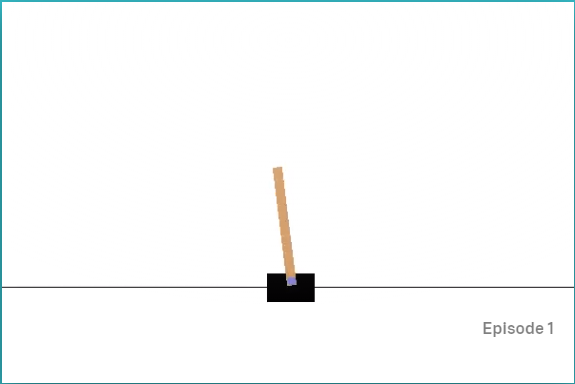

The idea is to teach our agent to balance a pole placed on a cart. Let's dive into it and see if I can create an agent based on what I've learnt before.

# In Progress......